# Hierarchical Clustering

This data set contains statistics, in arrests per 100,000 residents for assault, murder, and rape in each of the 50 US states in 1973. Also given is the percent of the population living in urban areas.

A data frame with 50 observations on 4 variables.

- Murder numeric Murder arrests (per 100,000)
- Assault numeric Assault arrests (per 100,000)
- UrbanPop numeric Percent urban population (%)
- Rape numeric Rape arrests (per 100,000)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
#pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [2]:
df = pd.read_csv("USArrests.csv", index_col=0) #suc ortalamalarina bakilacak
#0. column u index yaptik,1 yazsaydik o column index olurdu
#murder= cinayet, assault= fiziki saldiri, rape= tecavüz,taciz
#murder ve rape ciddi suclar belki toplanabilir ama bunlarla assault toplanmaz,sonuc objective cikmaz

In [3]:
df.head() #Alabama eyaletinde her 100 bin kisiye ortalama 13.2 suc ,cinayet orani düsüyor
#urbanpop = eyaletin bölgeye orani

,Murder,Assault,UrbanPop,Rape
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


## Exploratory Data Analysis and Visualization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Murder,50.0,7.788,4.355510,0.8,4.075,7.25,11.250,17.4
Assault,50.0,170.760,83.337661,45.0,109.000,159.00,249.000,337.0
UrbanPop,50.0,65.540,14.474763,32.0,54.500,66.00,77.750,91.0
Rape,50.0,21.232,9.366385,7.3,15.075,20.10,26.175,46.0


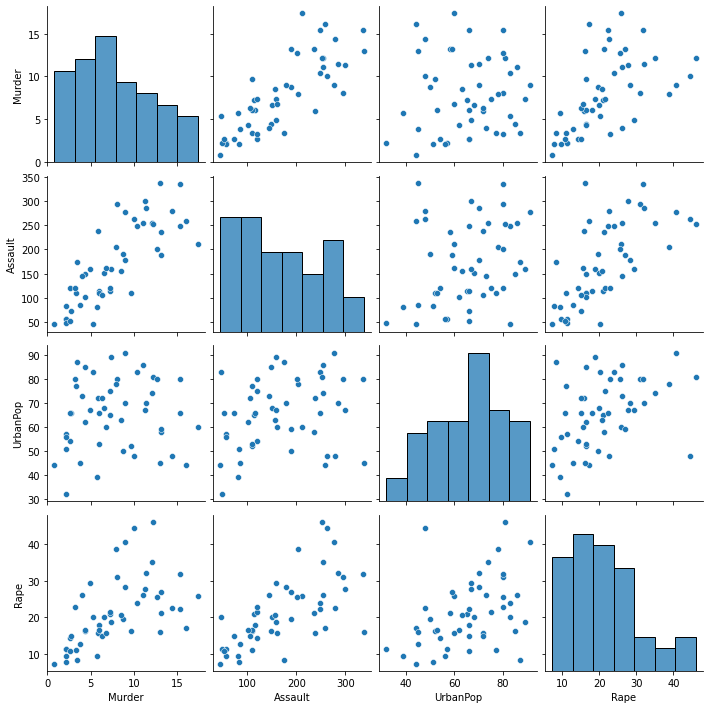

In [6]:
sns.pairplot(df);

In [ ]:
#murder ve assault üzerinden 2 class olabilir bu sonuca göre

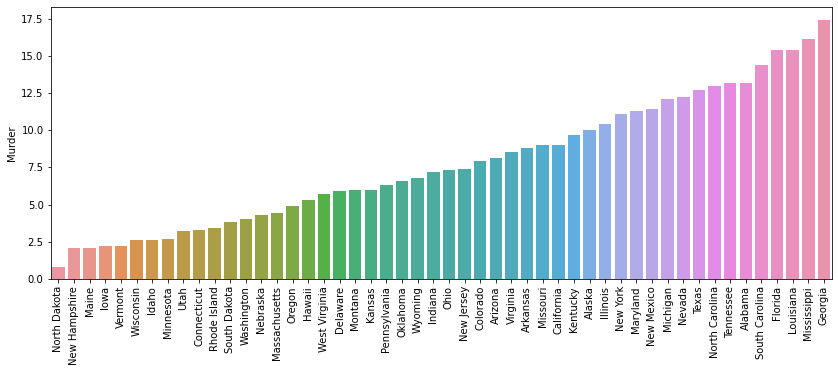

In [7]:
murder = df.Murder.sort_values()

plt.figure(figsize = (14,5))
sns.barplot(y = murder, x = murder.index)
plt.xticks(rotation = 90);

In [ ]:
#cinayet sucuna göre suc orani az, orta, cok diye ayirdik

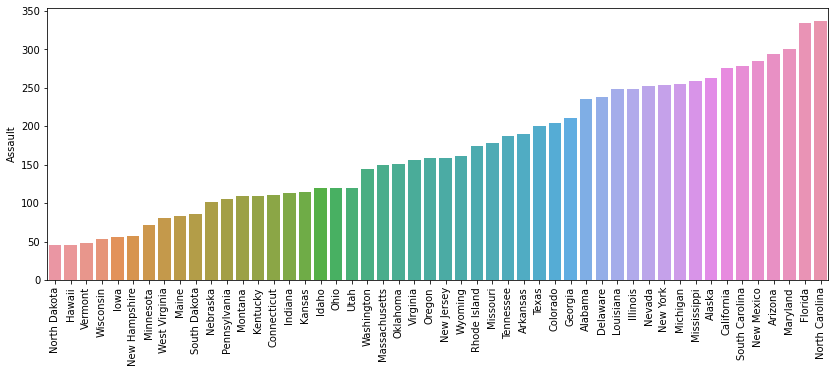

In [8]:
assault = df.Assault.sort_values()

plt.figure(figsize = (14,5))
sns.barplot(y = assault, x = assault.index)
plt.xticks(rotation = 90);

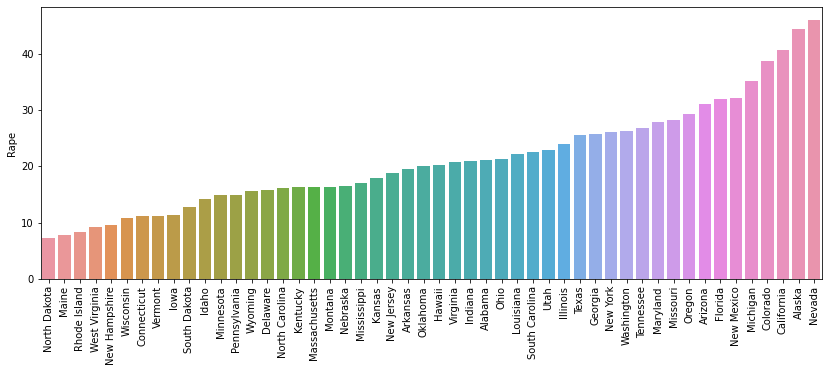

In [9]:
rape = df.Rape.sort_values()

plt.figure(figsize = (14,5))
sns.barplot(y = rape, x = rape.index)
plt.xticks(rotation = 90);

In [ ]:
#hepsindeki yüksek suc orani olan eyaletler ayniysa birlikte bakilabilir

## Hopkins Test

- Hopkins test, a statistical test for randomness of a variable.
- Null Hypothesis (Ho) : Data points are generated by non-random, uniform distribution (implying no meaningful clusters)
- Alternate Hypothesis (Ha): Data points are generated by random data points (presence of clusters)
- The more close 0, the more available to separate clusters

In [10]:
#!pip install pyclustertend

In [10]:
from pyclustertend import hopkins

In [14]:
hopkins(df, df.shape[0])

0.4253408535032576

In [15]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [16]:
df1 = df.copy()
df2 = df.copy()

In [17]:
hopkins(MinMaxScaler().fit_transform(df1), df1.shape[0])

0.3915625386220648

In [18]:
hopkins(StandardScaler().fit_transform(df2), df2.shape[0])

0.37142301797067817

In [19]:
scaler = MinMaxScaler()

In [20]:
df_scaled = scaler.fit_transform(df)

In [21]:
X = pd.DataFrame(df_scaled, columns=df.columns)
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [ ]:
#pipe line kurup bu islemlere istersek devam edebiliriz

## Dendrogram

- Tree-like hierarchical representation of clusters is called a dendrogram.   
- It illustrates the arrangement of the clusters produced by the corresponding analyses.

In [22]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [21]:
#dendrogram()

**“linkage” parameter: (default= “ward”)**

  {‘ward’, ‘complete’, ‘average’, ‘single’}

Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. 
-	Ward minimizes the variance of the clusters being merged.
-	Average uses the average of the distances of each observation of the two sets.
-	Complete or maximum linkage uses the maximum distances between all observations of the two sets.
-	Single uses the minimum of the distances between all observations of the two sets.


In [23]:
hc_ward = linkage(y = X, method = "ward") #4 ünü de verdik linkage icine
hc_complete = linkage(X, "complete")
hc_average = linkage(X, "average")
hc_single = linkage(X, "single")

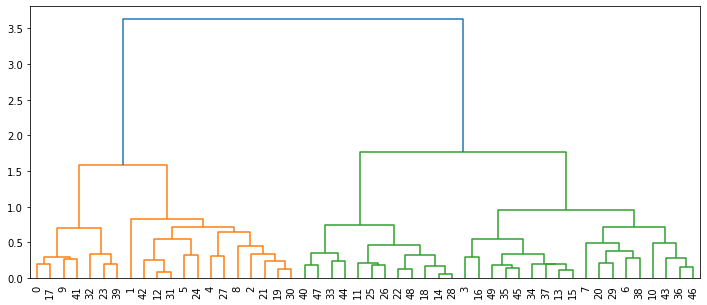

In [24]:
plt.figure(figsize = (12,5))
dendrogram(hc_ward, leaf_font_size = 10); #degerler scallendigi icin sayilar kücük cikti

In [ ]:
#2 güzel bir kümeleme gibi gözüküyor

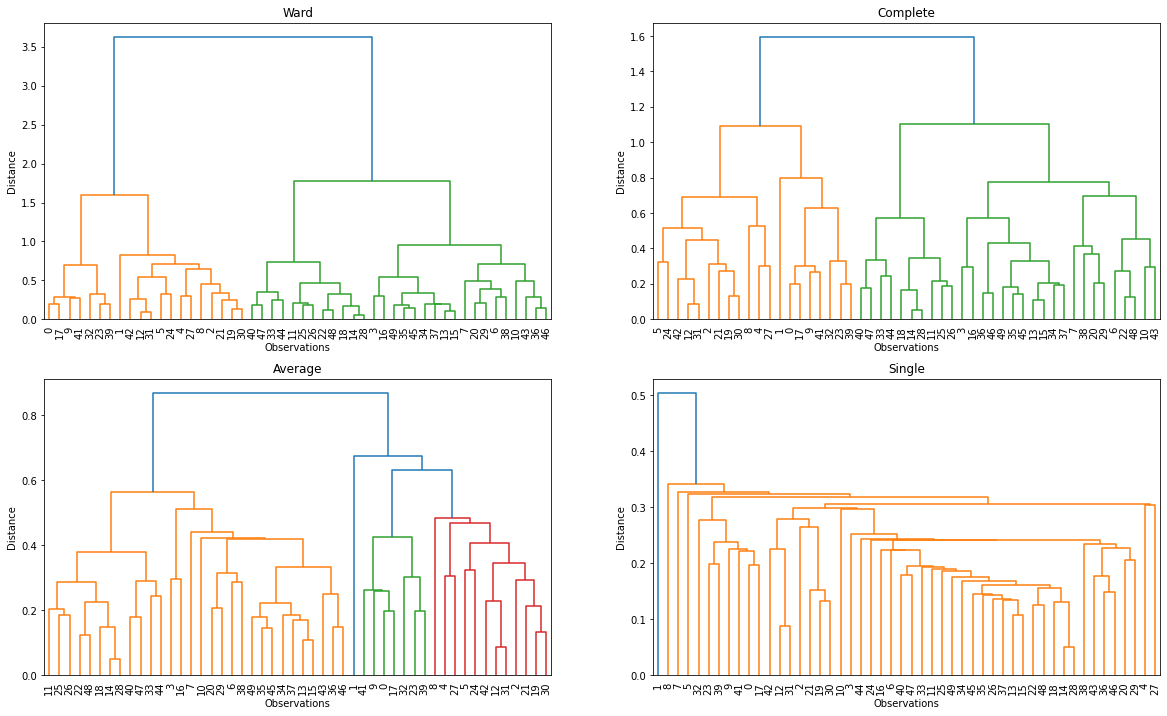

In [25]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [ ]:
#kümenin kendi icindeki mesafe birbiriyle olana göre cok yüksek

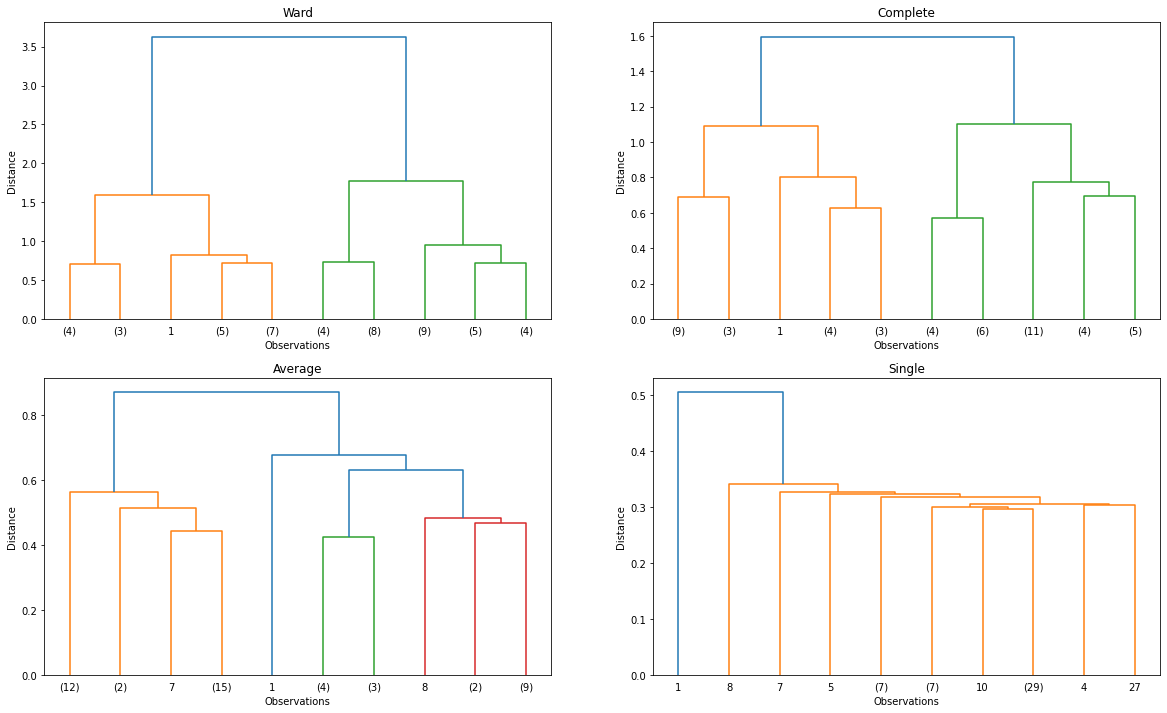

In [26]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10) #p=10 bizi yaniltabilir, default ile bakmakta fayda var

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

## Hierarchical Clustering (Agglomerative)

- Ideal clustering is characterised by minimal intra cluster distance and maximal inter cluster distanc

In [27]:
from sklearn.cluster import AgglomerativeClustering

### S(Silhouette) Score

- If the ground truth labels are not known, evaluation must be performed using the model itself. (One of the evaluation method is Silhouette Coefficient)
- A higher Silhouette Coefficient score relates to a model with better defined clusters. 
- a :The mean distance between a sample and all other points in the same class.
  b: The mean distance between a sample and all other points in the next nearest cluster.

s = (b-a) / max(a,b)

In [28]:
from sklearn.metrics import silhouette_score

In [29]:
K = range(2,10)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X, model.labels_)}')

Silhouette Score for 2 clusters: 0.42364457559625074
Silhouette Score for 3 clusters: 0.31916915428121284
Silhouette Score for 4 clusters: 0.3298707379986785
Silhouette Score for 5 clusters: 0.28290124293256447
Silhouette Score for 6 clusters: 0.28134198599501803
Silhouette Score for 7 clusters: 0.26010746919769046
Silhouette Score for 8 clusters: 0.23007745711627264
Silhouette Score for 9 clusters: 0.24179562627700718


In [ ]:
#2 mi 3 mü 4 mü bunlar birbirine cok yakin

In [30]:
model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = model.fit_predict(X)

In [31]:
X.head()

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465


In [32]:
X["clusters"] = clusters
X.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0


<Figure size 1440x720 with 0 Axes>

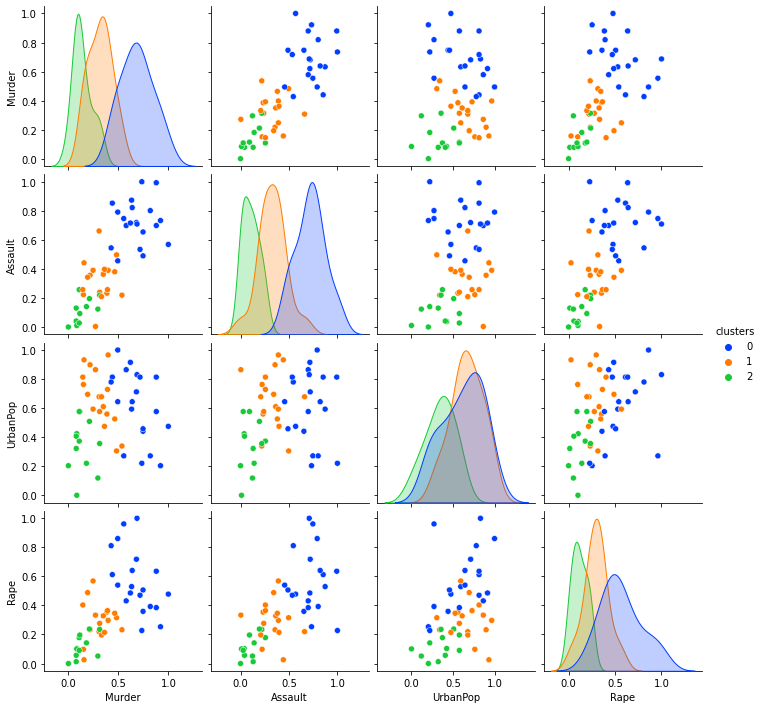

In [33]:
plt.figure(figsize = (20,10))
sns.pairplot(X, hue= "clusters", palette="bright");

In [ ]:
#urbanpop cok iyi bir insight saglamiyor gibi
#2 feature üzerinden daha iyi sonuc alabilirim gibi görünüyor

In [34]:
X.head()

,Murder,Assault,UrbanPop,Rape,clusters
0,0.746988,0.654110,0.440678,0.359173,0
1,0.554217,0.746575,0.271186,0.961240,0
2,0.439759,0.852740,0.813559,0.612403,0
3,0.481928,0.496575,0.305085,0.315245,1
4,0.493976,0.791096,1.000000,0.860465,0


In [35]:
clus_pred = X.groupby("clusters").mean().T
clus_pred

clusters,0,1,2
Murder,0.684639,0.316600,0.138052
Assault,0.720034,0.325533,0.106164
UrbanPop,0.616949,0.666667,0.340395
Rape,0.564987,0.294143,0.117140


<AxesSubplot:>

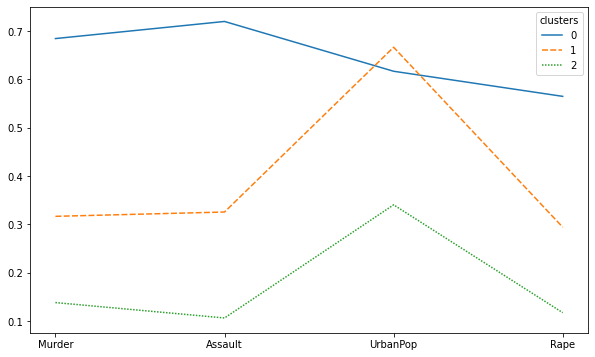

In [36]:
sns.lineplot(data = clus_pred)

In [37]:
import plotly.express as px

fig = px.scatter_3d(X, 
                    x='Murder',
                    y='Assault',
                    z='Rape',
                    color='clusters')
fig.show();

In [ ]:
#az suc isleyenlerle cok suc isleyenleri güzel ayiramamis

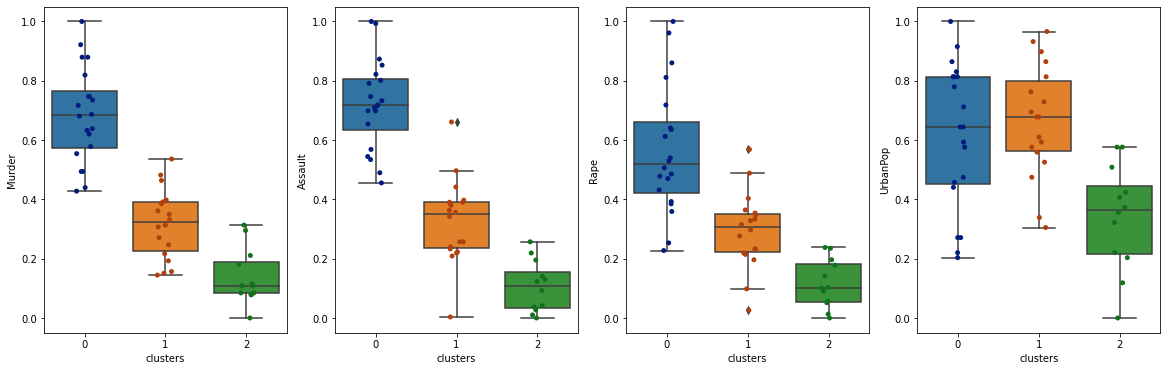

In [38]:
plt.figure(figsize = (20,6))

plt.subplot(141)
sns.boxplot(y = "Murder", x = "clusters", data = X)
sns.stripplot(y = "Murder", x = "clusters", data = X, palette="dark")

plt.subplot(142)
sns.boxplot(y = "Assault", x = "clusters", data = X)
sns.stripplot(y = "Assault", x = "clusters", data = X, palette="dark")

plt.subplot(143)
sns.boxplot(y = "Rape", x = "clusters", data = X)
sns.stripplot(y = "Rape", x = "clusters", data = X, palette="dark")

plt.subplot(144)
sns.boxplot(y = "UrbanPop", x = "clusters", data = X)
sns.stripplot(y = "UrbanPop", x = "clusters", data = X, palette="dark");

In [ ]:
#assault da birbirini kesmeme daha iyi gibi,ama urbanpop u kesin ayirmaliyim
#murder daki kesisme rape e göre daha az, o nedenle murder ile assault u alacagim
#boxplot ve strip plot iyi insight saglamamiza sebep oluyor

In [39]:
X.clusters.value_counts()

0    20
1    18
2    12
Name: clusters, dtype: int64

In [40]:
X2 = X.iloc[:, [0, 1]]
X2.head()

,Murder,Assault
0,0.746988,0.654110
1,0.554217,0.746575
2,0.439759,0.852740
3,0.481928,0.496575
4,0.493976,0.791096


## Hopkins test

In [43]:
hopkins(X2, X2.shape[0]) # hopkins test en 2 feature ister

0.3620588472830709

In [41]:
hc_ward = linkage(y = X2, method = "ward")
hc_complete = linkage(X2, "complete")
hc_average = linkage(X2, "average")
hc_single = linkage(X2, "single")

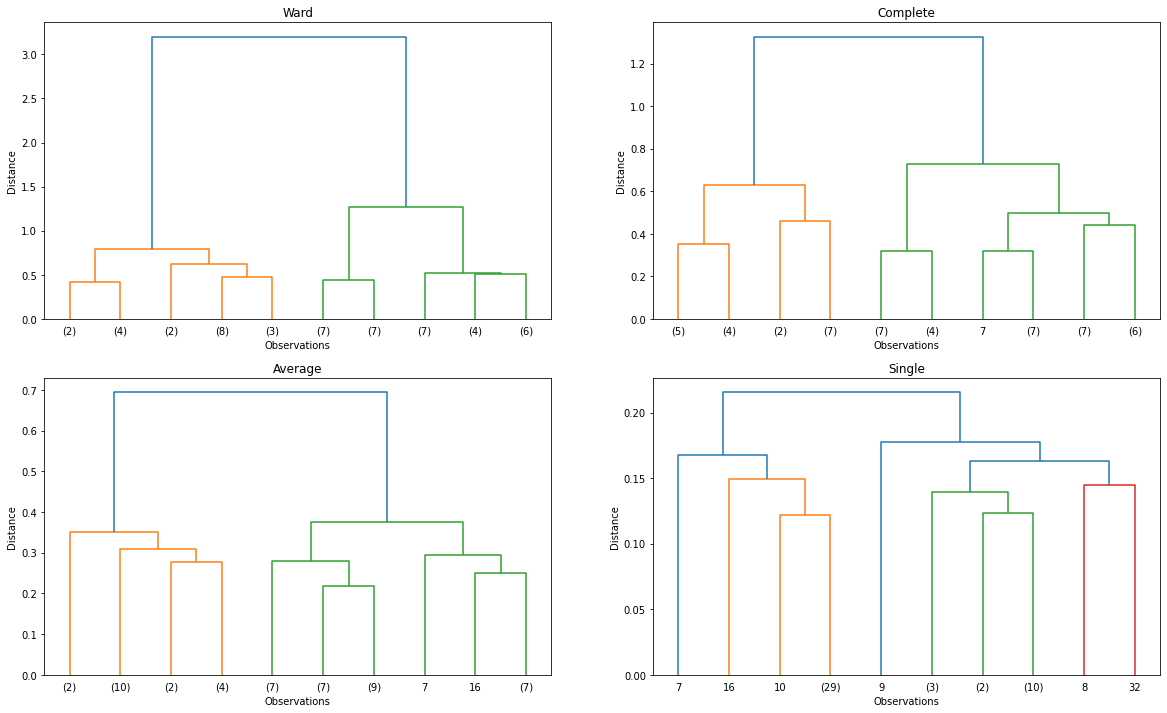

In [42]:
plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, truncate_mode = "lastp", p = 10, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, truncate_mode = "lastp", p = 10, leaf_font_size = 10);

In [43]:
K = range(2,11)

for k in K:
    model = AgglomerativeClustering(n_clusters = k)
    model.fit_predict(X2)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X2, model.labels_)}')

Silhouette Score for 2 clusters: 0.5747971215640975
Silhouette Score for 3 clusters: 0.4563598974035834
Silhouette Score for 4 clusters: 0.3834330689615163
Silhouette Score for 5 clusters: 0.39624584950759206
Silhouette Score for 6 clusters: 0.35167707644928276
Silhouette Score for 7 clusters: 0.387837454866414
Silhouette Score for 8 clusters: 0.3822361206974815
Silhouette Score for 9 clusters: 0.393480147196777
Silhouette Score for 10 clusters: 0.42224176833137783


In [ ]:
#0.57 ve 0.45 2 mi 3 mü, modeli 2 cluster üzerinden yapmaya karar verdim

In [44]:
final_model = AgglomerativeClustering(n_clusters=3, affinity = "euclidean", linkage = "ward")
clusters = final_model.fit_predict(X2)
X2["clusters"] = clusters

In [ ]:
#burda 3 yerine 2 yi de secerek bakabiliriz, sonuclar daha iyi olacak

In [45]:
X2.clusters.value_counts()

0    19
1    17
2    14
Name: clusters, dtype: int64

<AxesSubplot:xlabel='clusters', ylabel='Assault'>

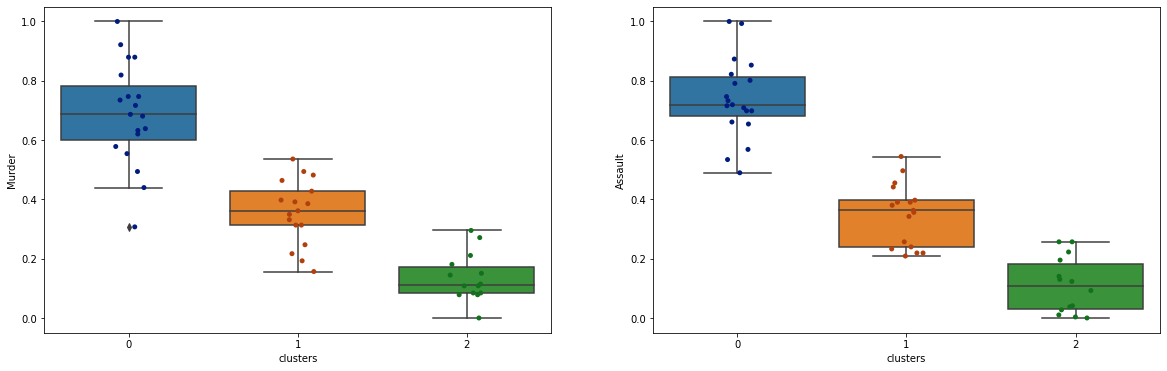

In [46]:
plt.figure(figsize = (20,6))

plt.subplot(121)
sns.boxplot(y = "Murder", x = "clusters", data = X2)
sns.stripplot(y = "Murder", x = "clusters", data = X2, palette="dark")

plt.subplot(122)
sns.boxplot(y = "Assault", x = "clusters", data = X2)
sns.stripplot(y = "Assault", x = "clusters", data = X2, palette="dark")


In [ ]:
#kesisme daha az, (4 feature ile baktigima nazaran), 2 feature ile almak daha iyi sonuc verdi
#2 feature yaparsam skorlar cok daha iyi cikiyor, kesisme var ama az gözlemde kesisme var
#görseller cok önemli box plot, stripplot gözlemler nerede yogunlasmis  nerede seyreklesiyor cok iyi anlamamizi sagliyor

**Evaluation**

- 0 : states with high crime rates
- 1 : states with medium crime rates
- 2 : states with low crime rates

In [47]:
X2["crime_level"] = X2["clusters"].map({0:"high", 1:"medium",2:"low"})
X2.head()

,Murder,Assault,clusters,crime_level
0,0.746988,0.654110,0,high
1,0.554217,0.746575,0,high
2,0.439759,0.852740,0,high
3,0.481928,0.496575,1,medium
4,0.493976,0.791096,0,high


In [48]:
df.index #tüm eyalet isimlerini gördük

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Rhode Island', 'South Carolina', 'South Dakota',
       'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'],
      dtype='object')

In [49]:
X2["States"] = df.index  #state isimlerini getirdik
X2

,Murder,Assault,clusters,crime_level,States
0,0.746988,0.654110,0,high,Alabama
1,0.554217,0.746575,0,high,Alaska
2,0.439759,0.852740,0,high,Arizona
3,0.481928,0.496575,1,medium,Arkansas
4,0.493976,0.791096,0,high,California
5,0.427711,0.544521,1,medium,Colorado
6,0.150602,0.222603,2,low,Connecticut
7,0.307229,0.660959,0,high,Delaware
8,0.879518,0.993151,0,high,Florida
9,1.000000,0.568493,0,high,Georgia


In [50]:
X2[X2.crime_level=="low"]["States"]

6       Connecticut
10           Hawaii
11            Idaho
14             Iowa
18            Maine
22        Minnesota
26         Nebraska
28    New Hampshire
33     North Dakota
40     South Dakota
43             Utah
44          Vermont
47    West Virginia
48        Wisconsin
Name: States, dtype: object

In [51]:
X2[X2.crime_level=="high"]["States"]

0            Alabama
1             Alaska
2            Arizona
4         California
7           Delaware
8            Florida
9            Georgia
12          Illinois
17         Louisiana
19          Maryland
21          Michigan
23       Mississippi
27            Nevada
30        New Mexico
31          New York
32    North Carolina
39    South Carolina
41         Tennessee
42             Texas
Name: States, dtype: object

In [52]:
X2[X2.crime_level=="medium"]["States"]

3          Arkansas
5          Colorado
13          Indiana
15           Kansas
16         Kentucky
20    Massachusetts
24         Missouri
25          Montana
29       New Jersey
34             Ohio
35         Oklahoma
36           Oregon
37     Pennsylvania
38     Rhode Island
45         Virginia
46       Washington
49          Wyoming
Name: States, dtype: object

In [ ]:
#low , high, medium olarak siniflandirdik